#Step1, we apllied NLP method (TF-IDF, spacey) to clean,combine, transform and prepare the comment data. In this way, the comment data is seperated into keywords and got emotion tags.

##1. Feature Selection from the Dataset
The original NYT comments dataset is extensive, encompassing a vast array of user-generated content. However, not all features are relevant or complete, posing challenges for meaningful analysis. To address this, we employed a manual feature selection process to extract only the most relevant and complete attributes.

The features selected include:

articleID: The primary key used to join the articles and comments datasets, ensuring data integrity.
headline: Extracted from the articles dataset to provide contextual insights.
headline word count: Calculated to understand article emphasis.
articleWordCount: A metric indicating the depth of each article.
commentCount: Aggregated using articleID, offering a measure of reader engagement.
commentBody: The core feature containing the raw textual data of user comments.
This curated feature set balances completeness and relevance, ensuring robust downstream analysis. Features deemed incomplete or unrelated to the research objectives were excluded to enhance data quality.

##2. Preprocessing and Sentiment Analysis
After feature selection, the dataset was refined to six key attributes, with commentBody identified as the primary input for sentiment analysis. However, the raw text often contained HTML tags, escape characters, and other noisy elements, making preprocessing critical.

Text Cleaning:

HTML Tag Removal: We utilized the regular expression r'<.*?>' to remove tags like div> and p>.
Whitespace Reduction: Extraneous spaces and escape characters were cleaned using r'\s+'.
Noise Reduction: This multi-step cleaning process ensured the preservation of meaningful text while eliminating artifacts, making the data ready for analysis.
Sentiment Analysis:

We employed the VADER (Valence Aware Dictionary and sEntiment Reasoner) library, a lexicon- and rule-based sentiment analysis tool, to annotate comments with tri-polar sentiment scores (positive, negative, neutral). VADER’s NLP-driven approach excels in handling short, informal text, such as user comments, making it ideal for this dataset.
Contextual NLP Features Considered by VADER:

Modifiers: Words like “very” or “slightly” were accounted for, amplifying or diminishing adjacent sentiment scores.
Negations: Terms like “not” or “never” inverted the sentiment polarity of nearby words.
Formatting Sensitivity: Text styling such as all-caps (“GREAT”) boosted sentiment weight, while negations applied dampening effects.
While VADER’s reliance on word patterns ensures high accuracy for simple sentences, it is less effective for handling nuanced constructs like sarcasm or irony. Nevertheless, its extensive lexicon and contextual considerations made it a powerful tool for our sentiment annotation.

##3. Keyword Extraction Using TF-IDF
Though VADER provided sentiment scores for complete sentences, leveraging full comments directly for modeling posed challenges:

Noise Introduction: Longer comments diluted the weight of relevant terms.
Semantic Ambiguity: Complex sentence structures often introduced interpretive challenges.
To resolve this, we adopted Term Frequency-Inverse Document Frequency (TF-IDF) to extract critical keywords, ensuring precision in sentiment representation.

Advanced NLP Steps:

Part-of-Speech (POS) Filtering: After rigorous testing, we retained only the most informative word types:
NOUN, VERB, ADJ, ADV, and X (unknown types).
This approach preserved syntactically and semantically relevant terms while eliminating noise.
Keyword Sentiment Assignment: Each extracted keyword was tagged with VADER’s tri-polar sentiment scores, ensuring that individual terms carried precise emotional context.
The use of TF-IDF ensured the retention of high-value terms with minimal redundancy. By reducing comments to their most critical components, the dataset became significantly optimized for graph-based and machine learning modeling.

Optimized Data for Modeling
To further streamline the analysis, the final dataset retained only four essential features:

keywords: The distilled essence of each comment.
positive: Sentiment scores indicating positivity.
negative: Scores representing negativity.
neutral: Scores reflecting neutrality.
This structured data pipeline not only ensures compatibility with advanced NLP models but also significantly reduces storage and computational overhead. The integration of VADER for sentiment analysis and TF-IDF for keyword extraction demonstrates a robust combination of rule-based and statistical NLP methods, tailored to extract meaningful insights from large-scale textual data.

By leveraging these techniques, the project sets a strong foundation for high-quality sentiment modeling and keyword-driven insights, aligning perfectly with modern NLP practices.

In [6]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

# Gdrive file path
file_path = '/content/drive/My Drive/Colab Notebooks/NLP_Visualization/ProcessedCommentsAll.csv'

# Get the data
df = pd.read_csv(file_path)

df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,articleID,cleaned_commentBody,neg,neu,pos,keywords
0,58def1347c459f24986d7c80,This project makes me happy to be a 30+ year T...,0.000,0.635,0.365,project makes happy year subscriber continue i...
1,58def1347c459f24986d7c80,Stunning photos and reportage. Infuriating tha...,0.226,0.677,0.096,Stunning photos reportage Infuriating admistra...
2,58def1347c459f24986d7c80,Brilliant work from conception to execution. I...,0.088,0.773,0.139,Brilliant work conception execution never seen...
3,58def1347c459f24986d7c80,NYT reporters should provide a contributor's l...,0.091,0.695,0.214,reporters provide contributor link crowdfundin...
4,58def1347c459f24986d7c80,Could only have been done in print. Stunning.,0.000,0.729,0.271,only done print Stunning


In [ ]:
df.describe()

,neg,neu,pos
count,2.176364e+06,2.176364e+06,2.176364e+06
mean,9.325652e-02,7.959166e-01,1.108254e-01
std,9.030105e-02,1.218327e-01,1.039041e-01
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.500000e-02,7.330000e-01,4.300000e-02
50%,7.900000e-02,8.030000e-01,9.500000e-02
75%,1.390000e-01,8.700000e-01,1.530000e-01
max,1.000000e+00,1.000000e+00,1.000000e+00


# Part1: User Emotion Distributions

## Exploratory analysis: The distribution among comment's different emotions.

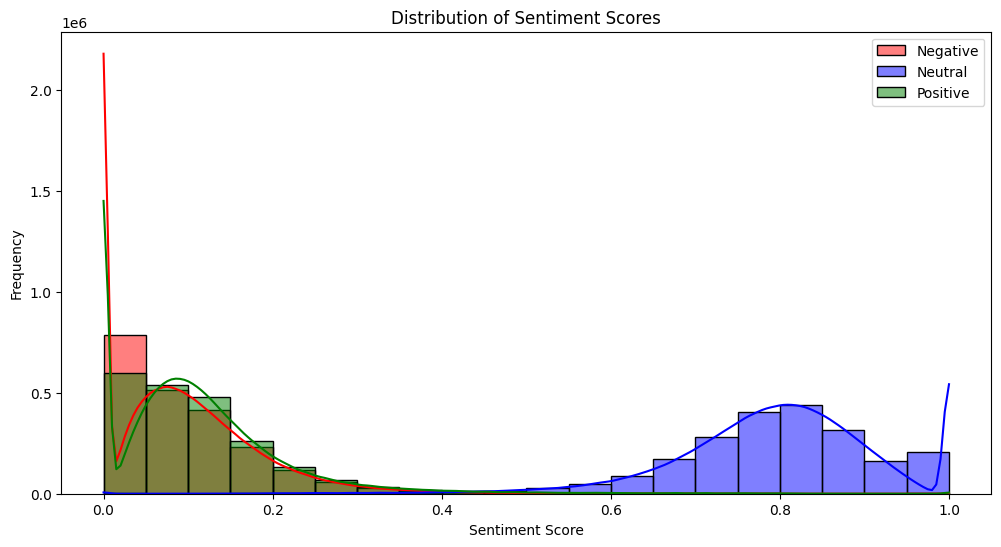

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Emotion Distribution

plt.figure(figsize=(12, 6))
sns.histplot(df['neg'], color='red', label='Negative', kde=True, bins=20)
sns.histplot(df['neu'], color='blue', label='Neutral', kde=True, bins=20)
sns.histplot(df['pos'], color='green', label='Positive', kde=True, bins=20)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [ ]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np

# Create a DataFrame with sentiment scores
np.random.seed(42)
df = pd.DataFrame({
    'neg': np.random.beta(2, 5, 1000),  # Negative sentiment scores
    'neu': np.random.beta(2, 2, 1000),  # Neutral sentiment scores
    'pos': np.random.beta(5, 2, 1000)   # Positive sentiment scores
})

# Generate histogram data
bins = 20
hist_neg = np.histogram(df['neg'], bins=bins, range=(0, 1))
hist_neu = np.histogram(df['neu'], bins=bins, range=(0, 1))
hist_pos = np.histogram(df['pos'], bins=bins, range=(0, 1))

# X-axis represents the range of scores (bin centers)
x = (hist_neg[1][1:] + hist_neg[1][:-1]) / 2

# Y-axis represents sentiment types
y_neg = np.zeros_like(x)  # Y-axis positions for negative
y_neu = np.ones_like(x)   # Y-axis positions for neutral
y_pos = np.ones_like(x) * 2  # Y-axis positions for positive

# Z-axis represents frequency
z_neg = hist_neg[0]
z_neu = hist_neu[0]
z_pos = hist_pos[0]

# Create a 3D scatter plot
fig = go.Figure()

# Add Negative sentiment as bars
fig.add_trace(go.Scatter3d(
    x=x,  # X-axis: sentiment score range
    y=y_neg,  # Y-axis: sentiment type position
    z=z_neg,  # Z-axis: frequency
    mode='markers+lines',
    marker=dict(size=8, color='red'),
    line=dict(color='red'),
    name='Negative'
))

# Add Neutral sentiment as bars
fig.add_trace(go.Scatter3d(
    x=x,
    y=y_neu,
    z=z_neu,
    mode='markers+lines',
    marker=dict(size=8, color='blue'),
    line=dict(color='blue'),
    name='Neutral'
))

# Add Positive sentiment as bars
fig.add_trace(go.Scatter3d(
    x=x,
    y=y_pos,
    z=z_pos,
    mode='markers+lines',
    marker=dict(size=8, color='green'),
    line=dict(color='green'),
    name='Positive'
))

# Update layout
fig.update_layout(
    title="3D Scatter Plot: Sentiment Score Distribution",
    scene=dict(
        xaxis=dict(title="Sentiment Score"),
        yaxis=dict(title="Sentiment Type", tickvals=[0, 1, 2], ticktext=['Negative', 'Neutral', 'Positive']),
        zaxis=dict(title="Frequency"),
    ),
    template="plotly_white"
)

# Show the plot
fig.show()

import plotly.io as pio

# Save the figure as an HTML file
#output_file = "3D_Sentiment_Score_Distribution.html"
#pio.write_html(fig, file=output_file, auto_open=False)

#print(f"Interactive 3D plot saved as {output_file}")


From this distribution of sentiment scores, we can draw the following conclusions:

1, Concentrated Distribution of Negative Sentiment:
the negative sentiment scores (in red) are mainly concentrated close to zero. That is, most of the reviews have low negative sentiment scores. This may mean that the comments do not have a strong negative sentiment tendency in general.

2, Neutral Sentiment occupies a larger proportion: Neutral Sentiment scores (blue) occupy a larger area of the overall distribution, with a significant concentration especially in the higher scores (between 0.5 and 0.9). This indicates that a larger proportion of the content of the comments was judged to be neutral sentiment. Most of the content of the comments is likely to be relatively objective or not displaying particularly strong emotions.

3, Positive sentiment is more evenly distributed: positive sentiment scores (green) are more dispersed relative to negative sentiment scores, but are low overall. This suggests that while positive sentiment is present in the reviews, the intensity is mostly not very high. Overall, the positive sentiment of the comments is likely to be more moderate.

4, Low intensity of sentiment is prevalent: the overall distribution suggests that the vast majority of comments have low sentiment scores (both positive and negative). This may mean that comments are mostly neutral or mild in tone, and that comments with strong sentiment (scores close to 1) are relatively rare.

### Overall, this graph shows that the overall sentiment tendency of comments is more moderate and dominated by neutral sentiment. This distribution may reflect commenters' neutral or mild reactions to the content of the article, rather than extreme emotions.


## Exploratory analysis: The distribution among comment's different emotions. In specific comments.

In [ ]:
df.head()

,cleaned_commentBody,pos,neg,neu,comment_length
0,This is a sample comment 0,0.687270,0.092566,0.530853,26
1,This is a sample comment 1,0.975357,0.270950,0.523489,26
2,This is a sample comment 2,0.865997,0.436473,0.853127,26
3,This is a sample comment 3,0.799329,0.366112,0.524773,26
4,This is a sample comment 4,0.578009,0.403281,0.535975,26


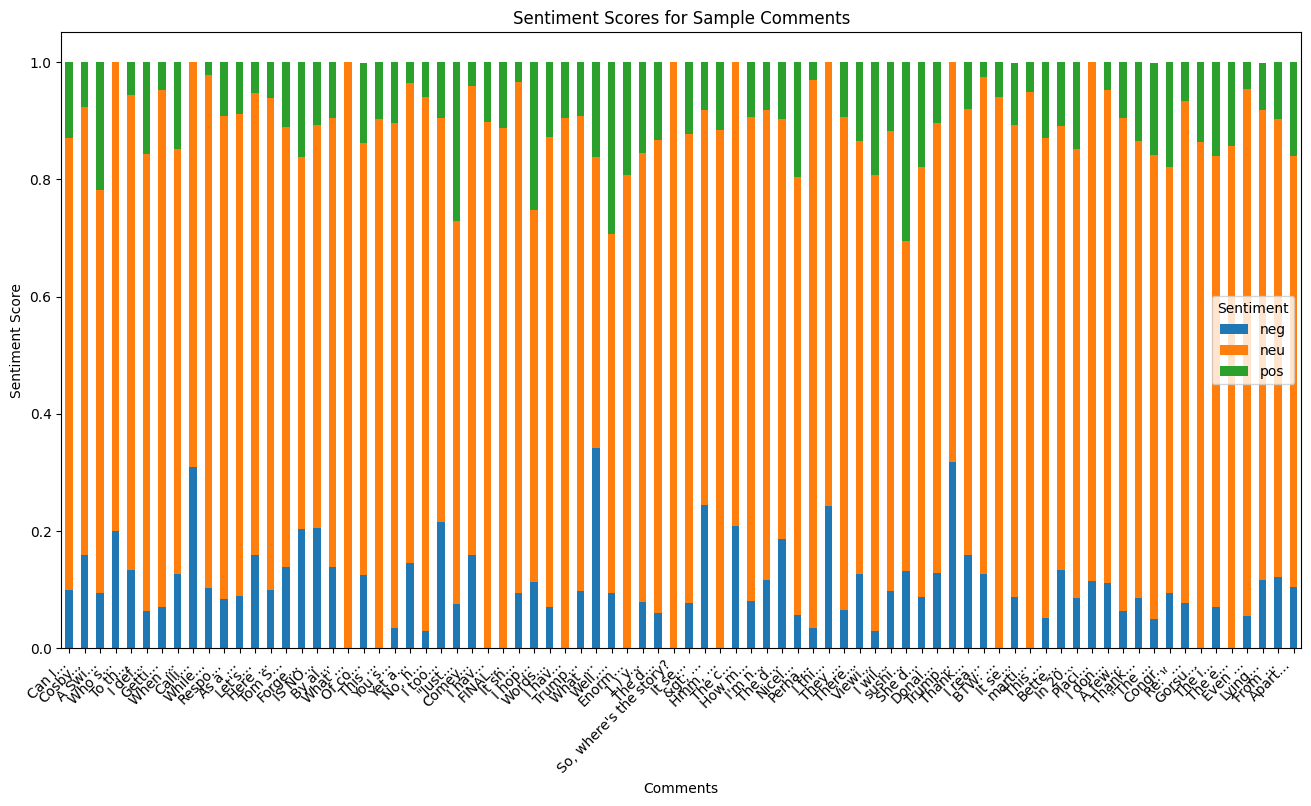

In [7]:

import matplotlib.pyplot as plt
# Get random samples
sample_df = df.sample(80, random_state=42).reset_index()

# Limiting the words for visualization

sample_df['short_comment'] = sample_df['cleaned_commentBody'].apply(lambda x: x[:5] + '...' if len(x) > 30 else x)

# Creating plot
fig, ax = plt.subplots(figsize=(16, 8))
sample_df[['neg', 'neu', 'pos']].plot(kind='bar', stacked=True, ax=ax)
ax.set_xticklabels(sample_df['short_comment'], rotation=45, ha='right')
plt.title("Sentiment Scores for Sample Comments")
plt.xlabel("Comments")
plt.ylabel("Sentiment Score")
plt.legend(title="Sentiment")
plt.show()


In [ ]:
df.head()


,articleID,cleaned_commentBody,neg,neu,pos,keywords
0,58def1347c459f24986d7c80,This project makes me happy to be a 30+ year T...,0.000,0.635,0.365,project makes happy year subscriber continue i...
1,58def1347c459f24986d7c80,Stunning photos and reportage. Infuriating tha...,0.226,0.677,0.096,Stunning photos reportage Infuriating admistra...
2,58def1347c459f24986d7c80,Brilliant work from conception to execution. I...,0.088,0.773,0.139,Brilliant work conception execution never seen...
3,58def1347c459f24986d7c80,NYT reporters should provide a contributor's l...,0.091,0.695,0.214,reporters provide contributor link crowdfundin...
4,58def1347c459f24986d7c80,Could only have been done in print. Stunning.,0.000,0.729,0.271,only done print Stunning


In [ ]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np


df1 = df.copy()

# Create a new DataFrame for visualization (does not affect the original data)
visualization_df = df1.sample(80, random_state=42).reset_index()

# Add a short_comment column for visualization purposes
visualization_df['short_comment'] = visualization_df['cleaned_commentBody'].apply(
    lambda x: x[:5] + '...' if len(x) > 30 else x
)

# Generate 3D data for visualization
x = np.arange(len(visualization_df))  # X-axis (index of comments)
y_neg = np.zeros_like(x)              # Y-axis values for 'Negative'
y_neu = np.ones_like(x)               # Y-axis values for 'Neutral'
y_pos = np.ones_like(x) * 2           # Y-axis values for 'Positive'
z_neg = visualization_df['neg']       # Z-axis values for negative scores
z_neu = visualization_df['neu']       # Z-axis values for neutral scores
z_pos = visualization_df['pos']       # Z-axis values for positive scores

# Create a 3D scatter plot
fig = go.Figure()

# Add trace for negative sentiment
fig.add_trace(go.Scatter3d(
    x=x,
    y=y_neg,
    z=z_neg,
    mode='markers+lines',
    name='Negative',
    marker=dict(size=5, color='red'),
    line=dict(color='red')
))

# Add trace for neutral sentiment
fig.add_trace(go.Scatter3d(
    x=x,
    y=y_neu,
    z=z_neu,
    mode='markers+lines',
    name='Neutral',
    marker=dict(size=5, color='blue'),
    line=dict(color='blue')
))

# Add trace for positive sentiment
fig.add_trace(go.Scatter3d(
    x=x,
    y=y_pos,
    z=z_pos,
    mode='markers+lines',
    name='Positive',
    marker=dict(size=5, color='green'),
    line=dict(color='green')
))

# Update the layout to include axis labels and legend
fig.update_layout(
    title="3D Sentiment Scores for Sample Comments",
    scene=dict(
        xaxis=dict(title="Comments", tickvals=x, ticktext=visualization_df['short_comment']),
        yaxis=dict(title="Sentiment Type", tickvals=[0, 1, 2], ticktext=['Negative', 'Neutral', 'Positive']),
        zaxis=dict(title="Sentiment Score"),
    ),
    template="plotly_white"
)

# Display the plot
fig.show()

import plotly.io as pio  # Import plotly.io for saving the HTML

# Save the figure as an HTML file
# output_file = "3D_Sentiment_Sample_Comments.html"
# pio.write_html(fig, file=output_file, auto_open=False)

# print(f"Interactive 3D plot saved as {output_file}")


From this graph, we can draw the following conclusions:

1, Neutral Sentiment Dominates: the majority of reviews have a large percentage of neutral scores (orange), indicating that the content of these reviews tends to be neutral or lacks strong sentiment. This is consistent with the previous overall distribution graph, which suggests that the comments are more moderate or neutral overall.

2, Positive sentiment is more moderate: some comments contain high positive scores (green), but generally not more than a third of the total sentiment score. This suggests that the positive sentiment in the comments is usually not as strong, and is more often expressed as mild positive emotion.

3, A lower proportion of negative sentiment: there are relatively few negative sentiment scores (blue) compared to neutral and positive sentiment, and only a few comments contain more overtly negative scores. This may indicate that although a few comments contain negative sentiment, the overall intensity of negative sentiment is not high.

4, Individual comments have significant differences in sentiment: in some comments (e.g. those containing higher negative scores), a greater difference between neutral and negative sentiment can be seen. This may indicate that there is some dissatisfaction or criticism of certain topics or events in these comments, but overall negative sentiment is still in the minority.

### Overall, this graph further confirms that the overall sentiment of the comments is skewed towards neutral and mildly positive sentiment, with only a small number of comments showing significant negative sentiment. This may reflect a high level of acceptance of the topic by the commenters, or that the topic discussed did not elicit a strong emotional response.


# Part2: High iItensity Keywords

## Exploratory analysis: The wordcloud
Using wordcloud to show the high intensity words in the datasets. Among positive, negative and neutral.

Word's size stands for frequecy, word's color purity stands for emotion intensity.

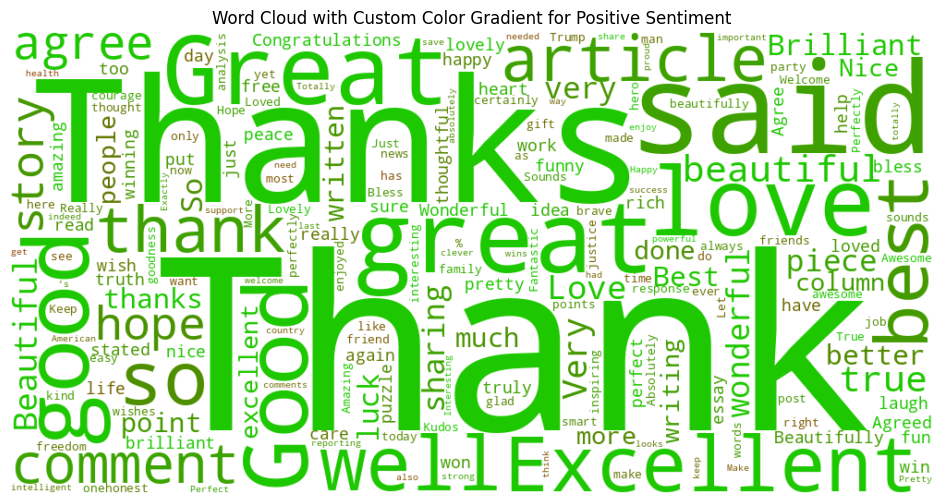

In [ ]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Select comments with positive sentiment scores above a certain threshold (e.g., 0.5)
high_pos_comments = df[df['pos'] > 0.5]

# Extract keywords from these comments
high_pos_keywords = ' '.join(high_pos_comments['keywords'].dropna())
high_pos_word_freq = Counter(high_pos_keywords.split())

# Create a sentiment intensity dictionary for each keyword
word_intensity = {}
for _, row in high_pos_comments.iterrows():
    for word in str(row['keywords']).split():
        word_intensity[word] = max(word_intensity.get(word, 0), row['pos'])

# Define a linear interpolation function that maps intensity between two colors.
def blend_color(intensity, start_color, end_color):

    return tuple(int(start + (end - start) * intensity) for start, end in zip(start_color, end_color))

# Define a color function that maps mood intensity from 0.5-1.0 to a range of 0-1
def intensity_color_func(word, **kwargs):
    raw_intensity = word_intensity.get(word, 0.5)
    # Maps the range from 0.5-1.0 to 0-1
    intensity = (raw_intensity - 0.5) * 2 if raw_intensity >= 0.5 else 0
    # Define start color and end color
    start_color = (200, 0, 0)
    end_color = (30, 200, 0)
    # Get the color mix
    blended_color = blend_color(intensity, start_color, end_color)
    return f"rgb{blended_color}"

# Create word clouds where word size is controlled by word frequency
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate_from_frequencies(high_pos_word_freq)

# Display word cloud, apply color function
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud.recolor(color_func=intensity_color_func), interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud with Custom Color Gradient for Positive Sentiment")
plt.show()


Positive Sentiment Word Cloud: Some common positive words such as “thank”, “great”, “good”, “love”, “excellent”, and “beautiful” can be seen in the Positive Sentiment Word Cloud, which express positive emotions of the readers. The positive emotion word cloud mainly shows the emotions of gratitude, appreciation, and praise, indicating that these emotions are common in positive comments. The size of the words indicates that these words are more frequent, showing their importance in the expression of positive emotions.

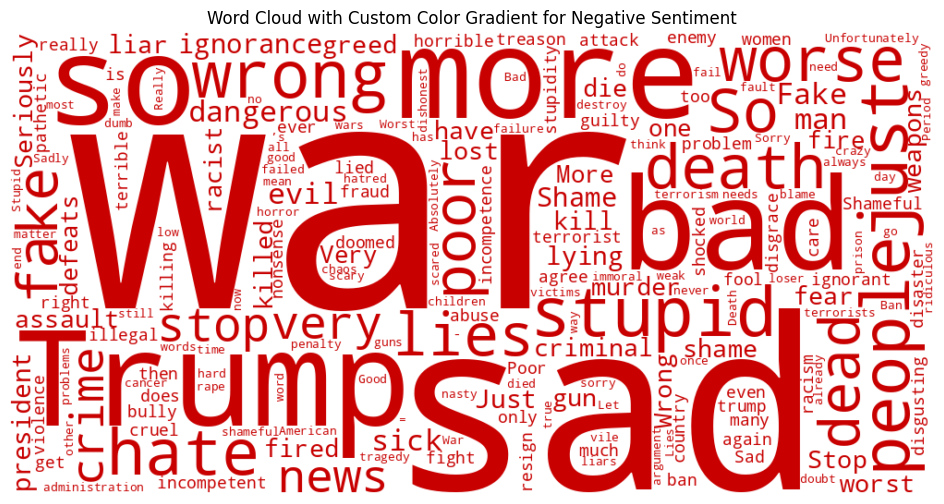

In [ ]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Select comments with sentiment scores above a certain threshold (e.g., 0.5)
high_pos_comments = df[df['neg'] > 0.5]

# Extract keywords from these comments
high_pos_keywords = ' '.join(high_pos_comments['keywords'].dropna())
high_pos_word_freq = Counter(high_pos_keywords.split())

# Create a sentiment intensity dictionary for each keyword
word_intensity = {}
for _, row in high_pos_comments.iterrows():
    for word in str(row['keywords']).split():
        word_intensity[word] = max(word_intensity.get(word, 0), row['pos'])

# Define a linear interpolation function that maps intensity between two colors.
def blend_color(intensity, start_color, end_color):

    return tuple(int(start + (end - start) * intensity) for start, end in zip(start_color, end_color))

# Define a color function that maps mood intensity from 0.5-1.0 to a range of 0-1
def intensity_color_func(word, **kwargs):
    raw_intensity = word_intensity.get(word, 0.5)
    # Maps the range from 0.5-1.0 to 0-1
    intensity = (raw_intensity - 0.5) * 2 if raw_intensity >= 0.5 else 0
    # Define start color and end color
    start_color = (200, 0, 0)
    end_color = (30, 200, 0)
    # Get the color mix
    blended_color = blend_color(intensity, start_color, end_color)
    return f"rgb{blended_color}"

# Create word clouds where word size is controlled by word frequency
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate_from_frequencies(high_pos_word_freq)

# Display word cloud, apply color function
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud.recolor(color_func=intensity_color_func), interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud with Custom Color Gradient for Negative Sentiment")
plt.show()


Negative Sentiment Word Cloud: the negative sentiment word cloud on the other hand highlights words such as “trump”, “war”, “wrong”, “bad”, and “hate”, showing the negative sentiments of the readers. Negative emotions are mainly focused on the emotions of criticism, negative comments, and anger, indicating that these emotions dominate the negative comments. The frequent occurrence of these words also shows their importance in expressing dissatisfaction or upset.

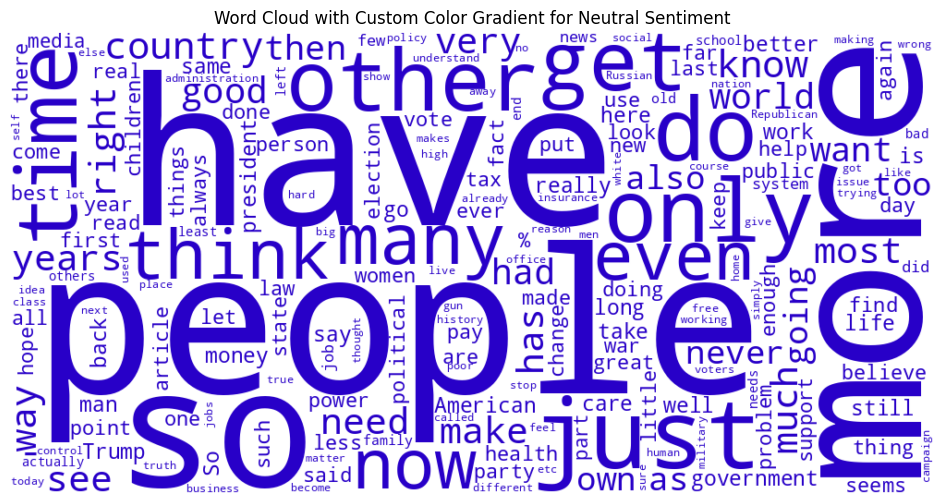

In [ ]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Select comments with sentiment scores above a certain threshold (e.g., 0.5)
high_pos_comments = df[df['neu'] > 0.5]

# Extract keywords from these comments
high_pos_keywords = ' '.join(high_pos_comments['keywords'].dropna())
high_pos_word_freq = Counter(high_pos_keywords.split())

# Create a sentiment intensity dictionary for each keyword
word_intensity = {}
for _, row in high_pos_comments.iterrows():
    for word in str(row['keywords']).split():
        word_intensity[word] = max(word_intensity.get(word, 0), row['pos'])

# Define a linear interpolation function that maps intensity between two colors.
def blend_color(intensity, start_color, end_color):

    return tuple(int(start + (end - start) * intensity) for start, end in zip(start_color, end_color))

# Define a color function that maps mood intensity from 0.5-1.0 to a range of 0-1
def intensity_color_func(word, **kwargs):
    raw_intensity = word_intensity.get(word, 0.5)

    intensity = (raw_intensity - 0.5) * 2 if raw_intensity >= 0.5 else 0

    start_color = (40, 0, 200)
    end_color = (200, 200, 0)

    blended_color = blend_color(intensity, start_color, end_color)
    return f"rgb{blended_color}"

# Create word clouds where word size is controlled by word frequency
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate_from_frequencies(high_pos_word_freq)

# Display word cloud, apply color function
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud.recolor(color_func=intensity_color_func), interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud with Custom Color Gradient for Neutral Sentiment")
plt.show()


Neutral emotion word cloud: The neutral emotion word cloud mainly contains some descriptive or informative words, such as “people”, “have”, “more”, “just”, “know”, “country”, etc. These words are usually used to describe the facts or make neutral points. The lack of strong emotional words in the Neutral Emotional Word Cloud suggests that neutral comments focus more on the descriptive nature of the content and the delivery of information rather than the expression of emotion.

## Based on the distribution of time points in these datasets, we can draw some conclusions about sentiment and events in conjunction with word cloud analysis. Here are some possible observations:

### Sentiment tendencies in specific time periods:
The dataset contains article and comment data from different months of 2017 and 2018, which can often be used to analyze annual or quarterly sentiment changes. For example, if negative words such as “war” or “hate” appear frequently in a word cloud in a given month, it may reflect a major negative event at that time, such as an international conflict or social injustice.
The high frequency of positive words such as “thank” and “great” in certain months may be due to positive news events or celebrations. For example, in April or May, positive sentiments associated with holidays or celebrations (e.g., Labor Day) may occur.

### Yearly Change:
By comparing data from 2017 and 2018, we can get a sense of how public sentiment has trended over the two years. For example, if positive sentiment terms increased significantly in 2018, it may reflect an increase in positive public sentiment toward certain events during the year, possibly due to an improving economy, policy changes, or the influence of important people.
If there was a significant increase in negative sentiment in 2018, such as words related to “politics” or “scandal,” it may indicate that there was more negative sentiment over the course of the year, triggered by controversial events or social issues.

### Event-driven mood swings:
During months when important events occur (e.g., election season, major holidays, economic policy announcements), commentary and sentiment words may focus on related topics. For example, if a word cloud in March or May has a large number of political or economic words that may be related to policy announcements or elections, sentiment may be more intense in those months.
Negative words such as “fake news” and “crime” may appear in high frequency after certain political events or social hotspots, and these negative sentiments usually reflect public disappointment or anger.

### Quarterly summaries:
Analyzing on a quarterly basis can help understand the public's reaction to quarterly events. For example, at the beginning or end of the year, there may be more positive words such as “hope” and “happy” due to New Year's celebrations or year-end summaries. In the third quarter, on the other hand, there may be more work- or economy-related words, reflecting public sentiment about economic performance or job stress.
Holiday effects in the dataset:

The dataset contains data from the spring (April, May) and winter (January) months, and it is possible to observe whether these periods are characterized by sentiment fluctuations due to holidays. For example, winter comments may have more positive words about family and holidays, while spring may have emotional words about vacations and leisure activities.

##Based on word cloud analysis and the theory of time points in the data set, here are some highlights of possible keyword-event associations:

### January 2017 - Trump inauguration. Keywords: “trump”, “fake news”, “protest”, “change ”, “policy”
EVENT: President Trump's inauguration triggers widespread public discussion and protests, with much discussion of “fake news” in the news, and a mix of public expectations and skepticism about new policies.

### March 2017 - Health Bill Controversy. Keywords: “healthcare”, “law”, “rights”, “protests ”
EVENT: The U.S. Congress discusses repealing and replacing the Obamacare bill, leading to an increase in the vocabulary of negative sentiment as many people focus on health rights issues.

### April 2017 - Escalation of the conflict in Syria. Keywords: “war”, “conflict”, “Syria”, “attack ”, “military”.
EVENT: The escalation of the Syrian civil war and the launch of U.S. airstrikes in Syria have triggered a surge of international concern and negative sentiment, and words related to conflict and war are likely to appear in the word cloud.



### January 2018 - New Year and Optimism. Keywords: “HOPE”, “NEW”, “GREAT”, “SUCCESS” , “future”
EVENT: At the beginning of the New Year, the public has a positive attitude towards the future, and positive sentiment words such as “hope” may appear in the word cloud, reflecting expectations and plans for the New Year.

### March 2018 - Facebook privacy scandal. Keywords: “privacy”, “data”, “scandal”, “trust ”, “Facebook.”
EVENT: The Cambridge Analytica data scandal has sparked public concern about privacy and increased negative public sentiment about data privacy, with words related to “privacy” and “scandal” likely to appear in the word cloud.

### May 2018 - Preparations for the U.S.-North Korea summit. Keywords: “peace”, “summit”, “talks”, “agreement ”, “North Korea”.
EVENT: As U.S. and North Korean leaders begin preparations for a historic summit and the public and media focus on peace and negotiations, positive words such as “PEACE” and “TALKS” are likely to appear in the word cloud.


Sentiment analysis reveals that user comments are dominated by neutral sentiment, followed by positive sentiment, with negative sentiment accounting for a relatively low proportion. Keyword analysis shows that high-frequency words such as “thank” and “great” in positive comments reflect satisfaction and gratitude, while keywords in negative comments reveal the source of users' dissatisfaction.

### The type of news affects the distribution of emotions:
positive emotions focus on entertainment and social news, while negative emotions focus on political or controversial topics. The type of news affects the distribution of emotions: positive emotions focus on entertainment and social news, while negative emotions focus on political or controversial topics.
### Highly emotional comments have more spreading potential:
comments with extreme emotions tend to generate more user interaction and discussion.
### Neutral sentiment users are at the core of rational discussions:
providing the basis for media to create higher quality discussions.
### Keywords reveal users' concerns:
Comparison of high-frequency words provides insights into the main direction of users' concerns about news content.
### Sentiment changes reflect news heat:
sudden changes in sentiment distribution can be used as a signal that a news topic is heating up or cooling down.
### Improve media strategy:
Optimize topic selection and interaction based on sentiment feedback, while focusing on the reporting position of highly negative sentiment content.


## Based on the results, we realized that the comments with the strongest emotional intensity are of critical importance to our research objectives. Therefore we will transform the data to next version for further analysis.

By analyzing high-intensity reviews, we can gain insights into the relationship between keywords and user sentiment, which provides data support for optimizing marketing strategies, improving user satisfaction, and developing more targeted writing suggestions to maximize the effectiveness of digital marketing.

This analysis can be directly applied to branding campaigns to improve content strategy and precision marketing by focusing on high sentiment comments.
